In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from imblearn .combine import SMOTETomek
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [4]:
#checking shape of dataset 
df.shape

(600, 6)

In [5]:
#checking with info of data 
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
#decriptive statistics 
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Visualization

array([[<AxesSubplot:title={'center':'Taxable.Income'}>]], dtype=object)

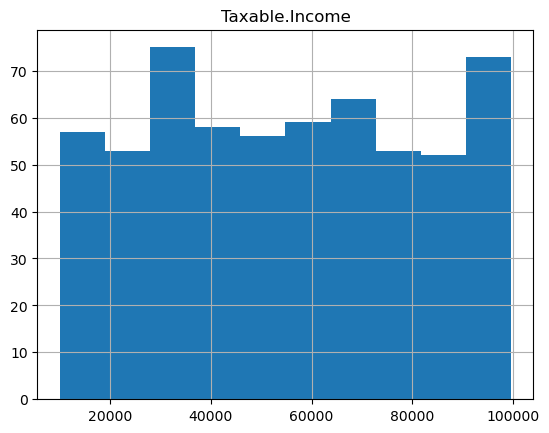

In [7]:
#plotting histogram for taxable income 
df.hist('Taxable.Income')

# Divide the taxable income < 30000 as risky = 0 , and > 30000 as good = 1 

In [8]:
#converting our Taxable income data to categorical column
df1 = df.copy()
df1['Taxable_Income_cat'] = pd.cut(x = df['Taxable.Income'], bins = [0,30000,99700],labels =['Risky','Good'],right = False)
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income_cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


Undergrad


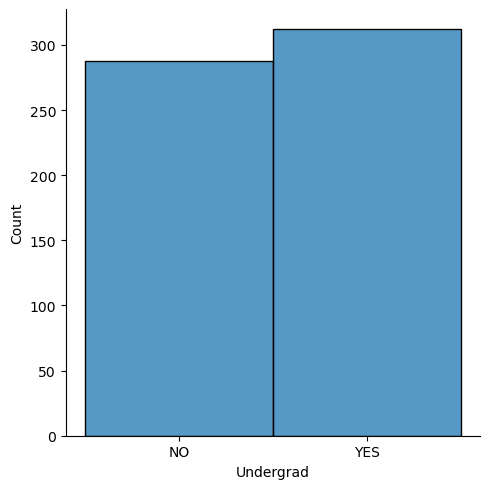

<Figure size 2000x700 with 0 Axes>

Marital.Status


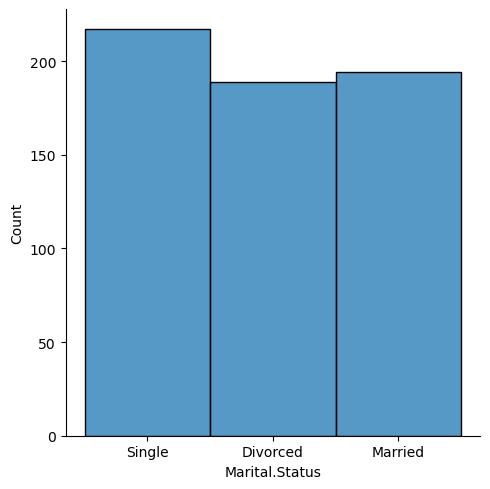

<Figure size 2000x700 with 0 Axes>

Taxable.Income


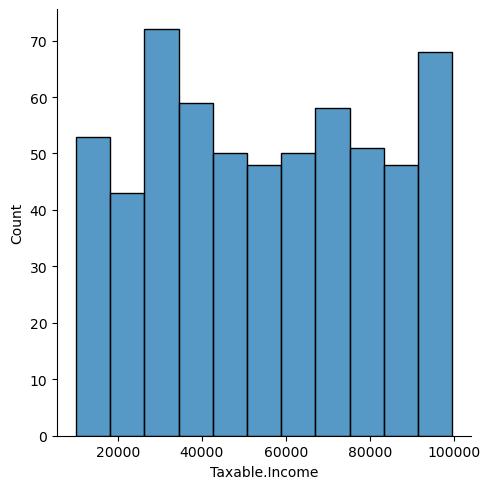

<Figure size 2000x700 with 0 Axes>

City.Population


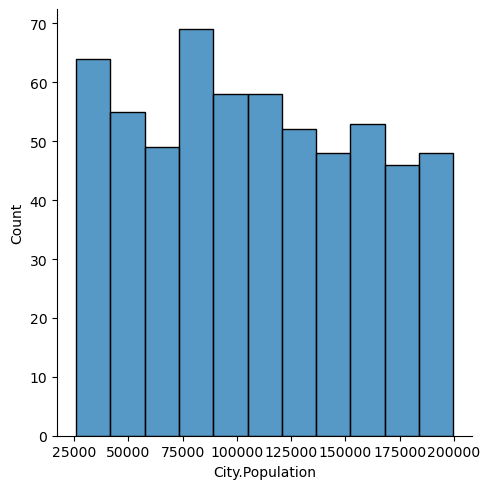

<Figure size 2000x700 with 0 Axes>

Work.Experience


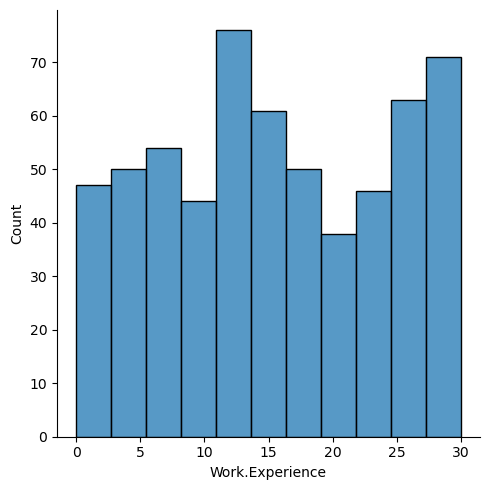

<Figure size 2000x700 with 0 Axes>

Urban


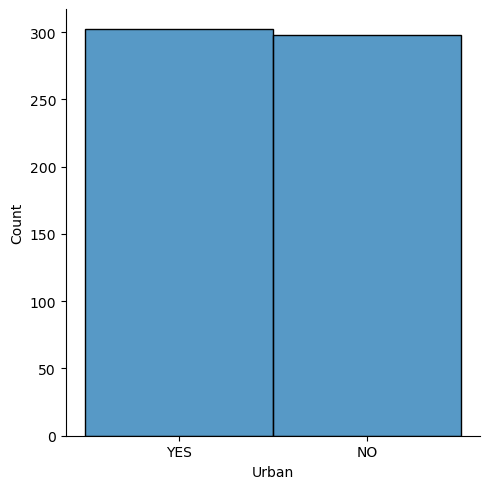

<Figure size 2000x700 with 0 Axes>

Taxable_Income_cat


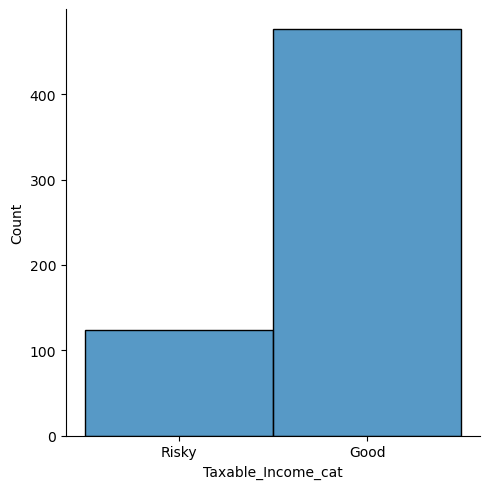

<Figure size 2000x700 with 0 Axes>

In [10]:
#checking distribution of data, analysis for skewness and kurtosis

for n in df1.columns:
    print(n)
    sns.displot(df1[n])
    plt.figure(figsize=(20,7))
    plt.show()

Undergrad


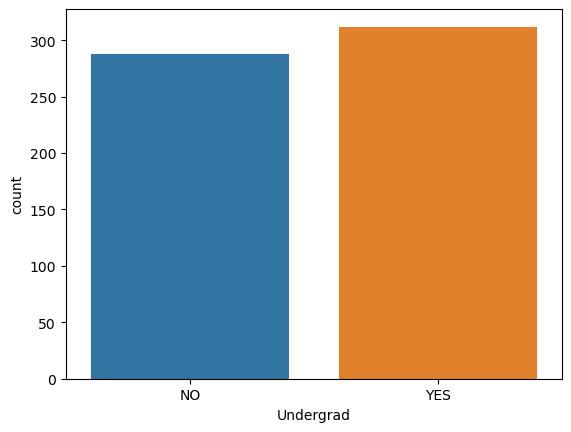

<Figure size 2000x700 with 0 Axes>

Marital.Status


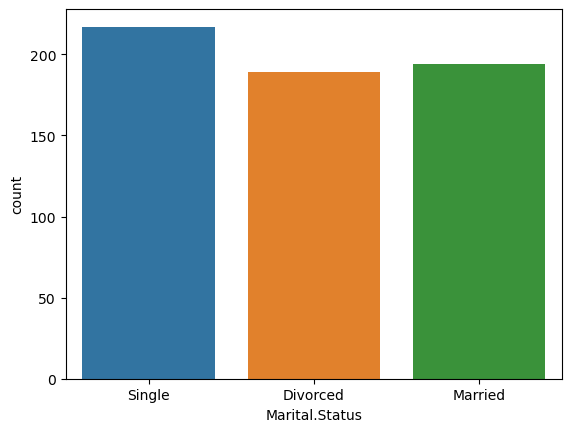

<Figure size 2000x700 with 0 Axes>

Taxable.Income


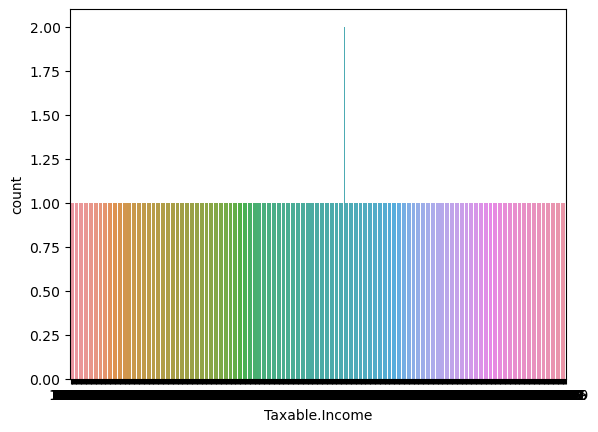

<Figure size 2000x700 with 0 Axes>

City.Population


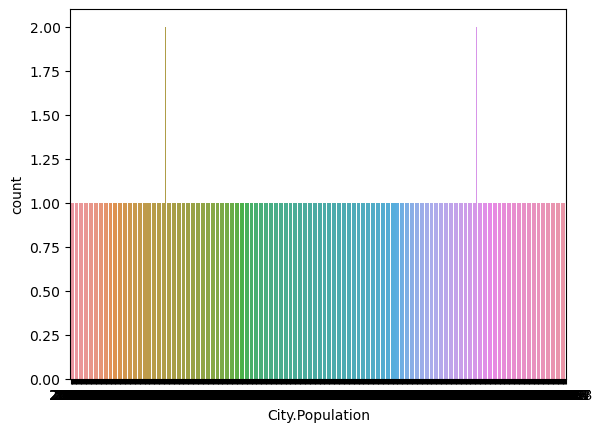

<Figure size 2000x700 with 0 Axes>

Work.Experience


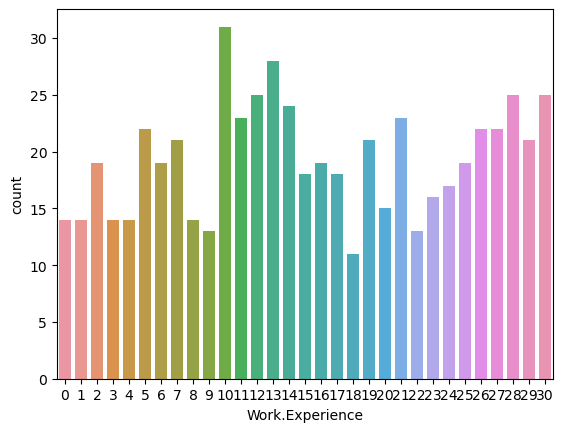

<Figure size 2000x700 with 0 Axes>

Urban


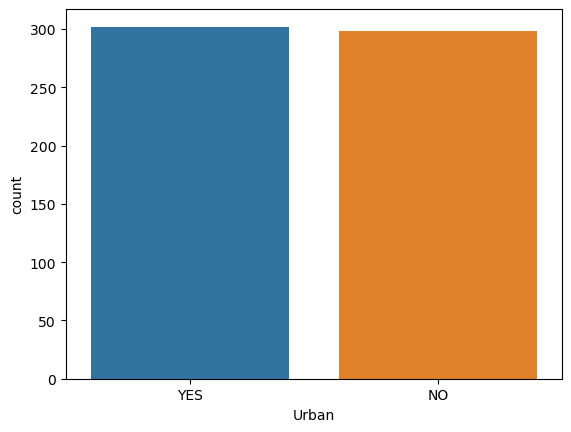

<Figure size 2000x700 with 0 Axes>

Taxable_Income_cat


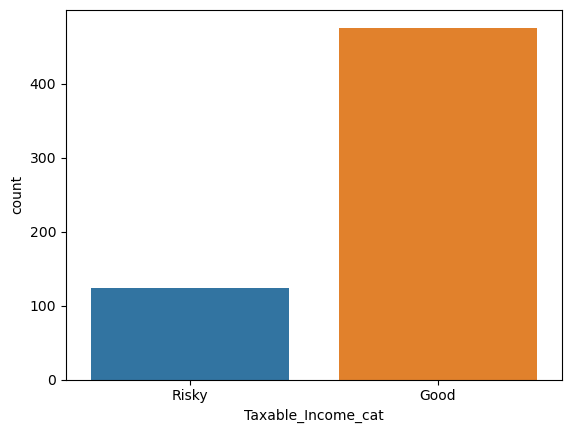

<Figure size 2000x700 with 0 Axes>

In [11]:
#checking data with countplot 

for n in df1.columns:
    print(n)
    sns.countplot(df1[n])
    plt.figure(figsize=(20,7))
    plt.show()

Undergrad


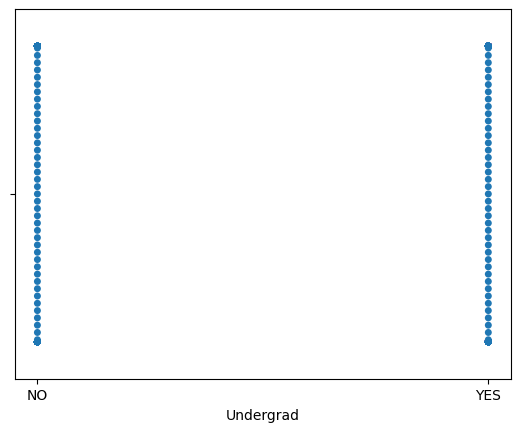

<Figure size 2000x1000 with 0 Axes>

Marital.Status


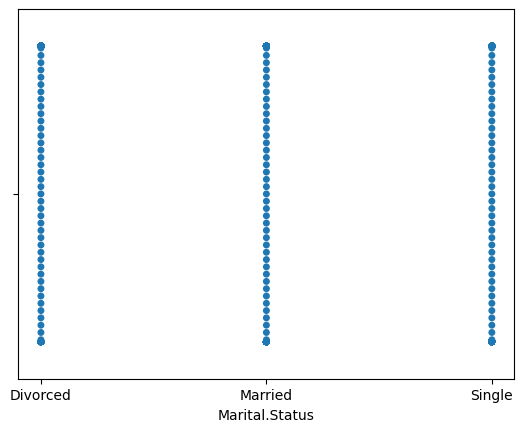

<Figure size 2000x1000 with 0 Axes>

Taxable.Income


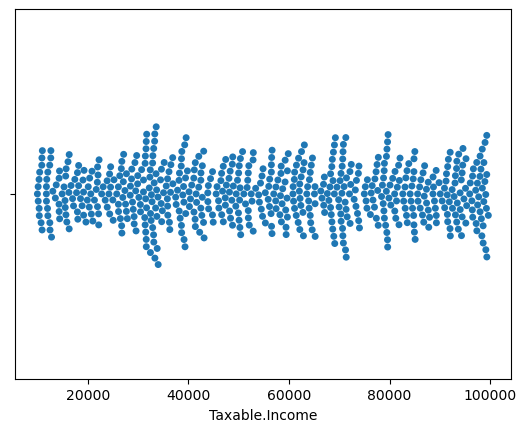

<Figure size 2000x1000 with 0 Axes>

City.Population


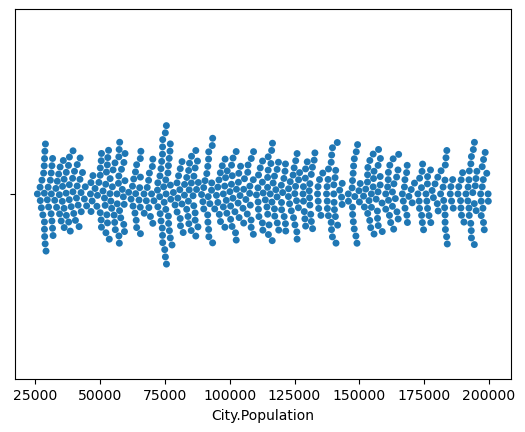

<Figure size 2000x1000 with 0 Axes>

Work.Experience


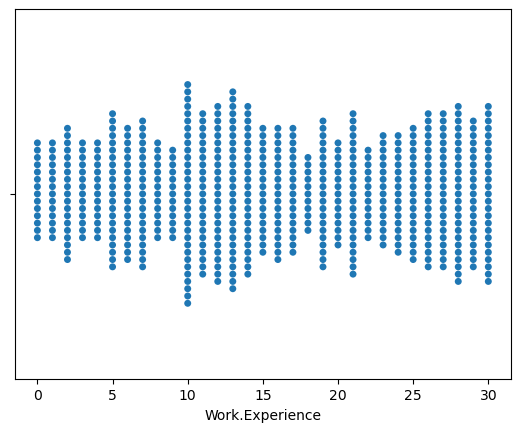

<Figure size 2000x1000 with 0 Axes>

Urban


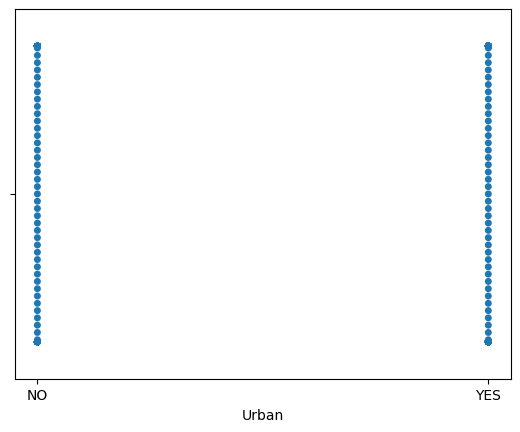

<Figure size 2000x1000 with 0 Axes>

Taxable_Income_cat


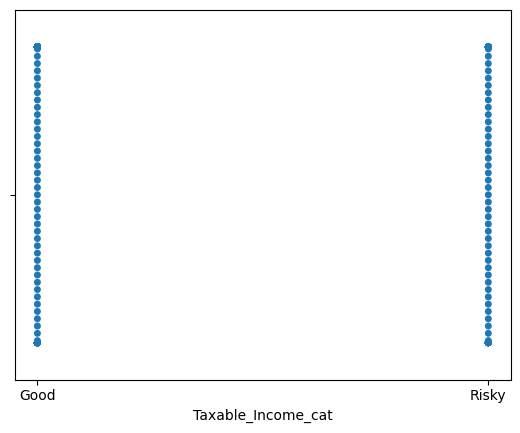

<Figure size 2000x1000 with 0 Axes>

In [12]:
#checking representation of categorical variables without overlapping of points 

for n in df1.columns:
    print(n)
    sns.swarmplot(df1[n])
    plt.figure(figsize=(20,10))
    plt.show()

In [13]:
#checking with taxable income value counts 
df1.Taxable_Income_cat.value_counts()

Good     476
Risky    124
Name: Taxable_Income_cat, dtype: int64

In [14]:
#converting Urban to unique value where no = 0 and yes = 1
label_encoder = preprocessing.LabelEncoder()
df1['Urban'] = label_encoder.fit_transform(df1['Urban'])

In [15]:
#checking with Urban value counts 
df1.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [16]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income_cat
0,NO,Single,68833,50047,10,1,Good
1,YES,Divorced,33700,134075,18,1,Good
2,NO,Married,36925,160205,30,1,Good
3,YES,Single,50190,193264,15,1,Good
4,NO,Married,81002,27533,28,0,Good


In [17]:
#converting undergrad to unique value where no = 0 and yes = 1
label_encoder = preprocessing.LabelEncoder()
df1['Undergrad'] = label_encoder.fit_transform(df1['Undergrad'])

In [18]:
#checking with undergrad value counts 
df1.Undergrad.value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [19]:
#converting maritial to unique value where no = 0 and yes = 1
label_encoder = preprocessing.LabelEncoder()
df1['Marital.Status'] = label_encoder.fit_transform(df1['Marital.Status'])

In [20]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income_cat
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [21]:
#renaming the columns 
df1 = df1.rename({'Marital.Status':'Marital Status','Work.Experience' : 'Work Experience','Taxable.Income':'Taxable Income'},axis = 1)
df1.head()

,Undergrad,Marital Status,Taxable Income,City.Population,Work Experience,Urban,Taxable_Income_cat
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [22]:
#checking the correlation
df1.corr()

,Undergrad,Marital Status,Taxable Income,City.Population,Work Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


<AxesSubplot:>

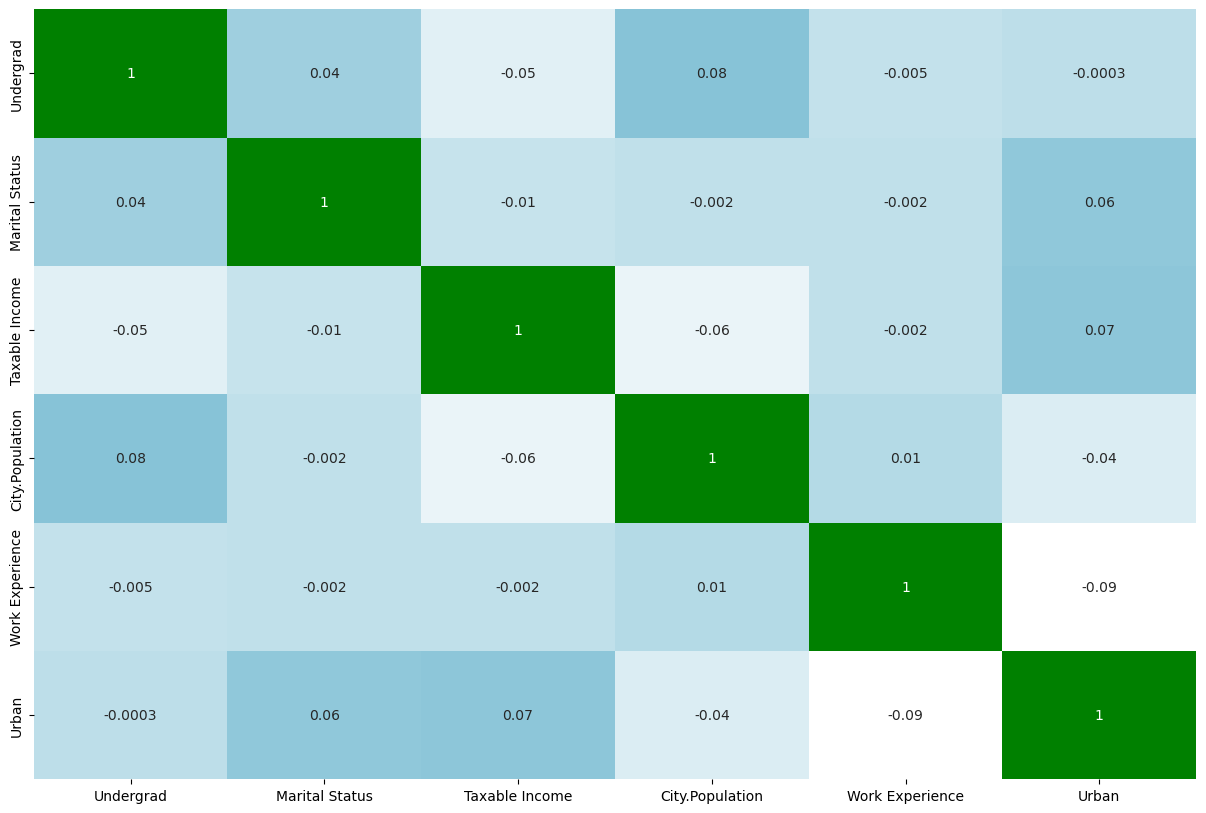

In [25]:
#*Pearson's Correlation Coefficient*: helps you find out the relationship between two quantities
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(df1.corr(),annot=True,fmt='.1g',cbar=False,cmap="ocean_r")

<AxesSubplot:>

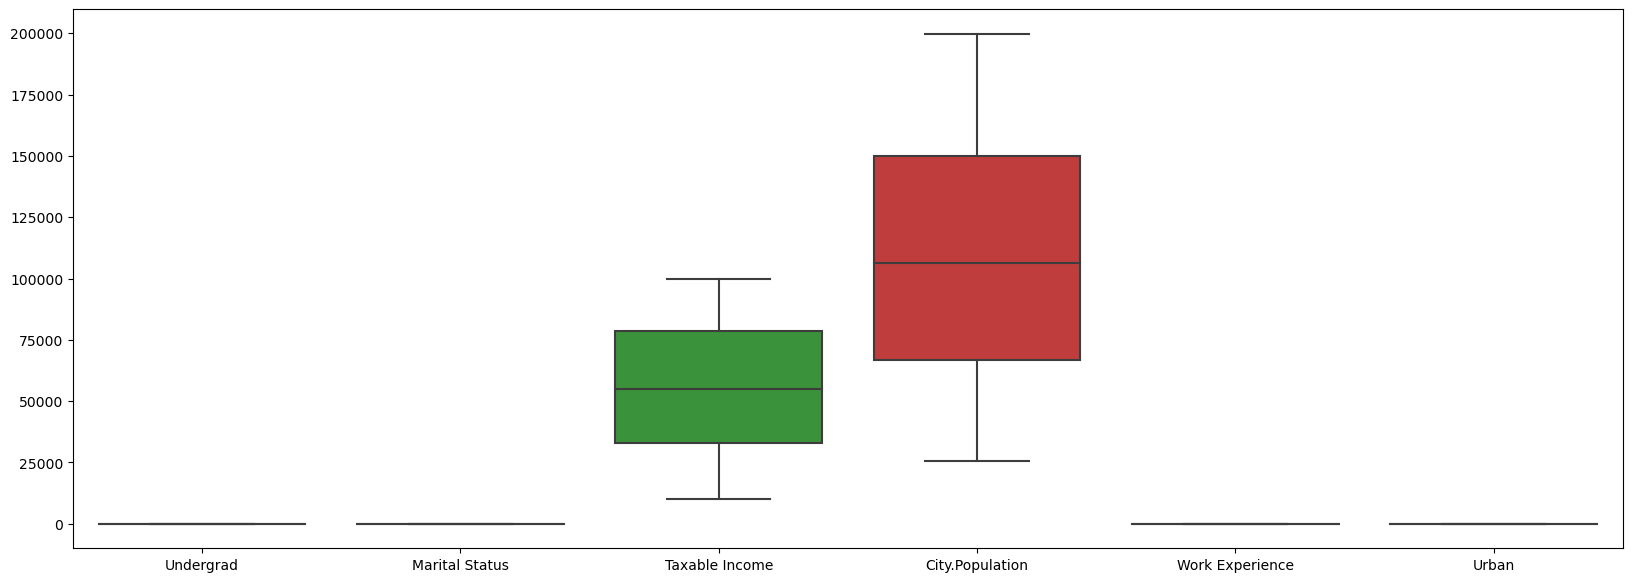

In [26]:
#checking for any outliers 
plt.figure(figsize=(20,7))
sns.boxplot(data = df1)

In [27]:
#checking with undergrad value counts 
df1.Taxable_Income_cat.value_counts()

Good     476
Risky    124
Name: Taxable_Income_cat, dtype: int64

In [28]:
df1.head()

,Undergrad,Marital Status,Taxable Income,City.Population,Work Experience,Urban,Taxable_Income_cat
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


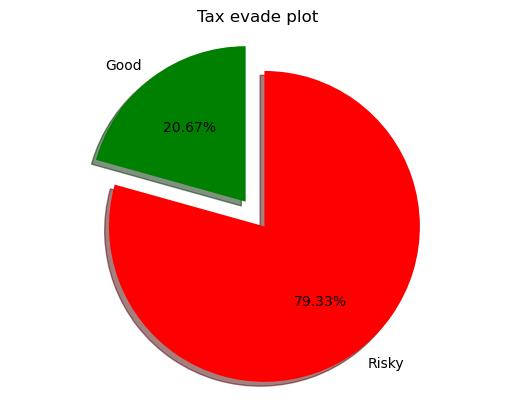

In [29]:
#fraud division or balance using pie chart
labels =['Good','Risky']
colors =['green','red']
sizes = [124,476]
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,
       explode= (0.1,0.1),autopct ='%1.2f%%')
plt.title('Tax evade plot')
plt.axis('equal')
plt.show()

In [30]:
#converting Urban to unique value where no = 0 and yes = 1
label_encoder = preprocessing.LabelEncoder()
df1['Taxable_Income_cat'] = label_encoder.fit_transform(df1['Taxable_Income_cat'])

In [31]:
#checking with taxable income value counts 
df1.Taxable_Income_cat.value_counts()

0    476
1    124
Name: Taxable_Income_cat, dtype: int64

#  SOMTETomek to balance the data

In [32]:
#splitting our data into x and y 
X = df1.iloc[:,0:6]
Y = df1['Taxable_Income_cat']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
#checking our balance of data after train test split
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (480, 6)
Training Labels Shape: (120, 6)
Testing Features Shape: (480,)
Testing Labels Shape: (120,)


In [35]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

In [36]:
X_res.shape,y_res.shape

((764, 6), (764,))

In [37]:
from collections import Counter
print('original dataset shape {}'.format(Counter(Y)))
print('resamples dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({0: 476, 1: 124})
resamples dataset shape Counter({0: 382, 1: 382})


In [38]:
#application of train_test_split for decision tree 
X_res_train,X_res_test,y_res_train,y_res_test = train_test_split(X_res,y_res,test_size= 0.25,random_state=42)

## Checking with hyperparameters for random forest

In [39]:
param_grid = {
    'bootstrap':[True],
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3,4,5,6],
    'min_samples_split':[2,4,6],
    'min_samples_split':[4,8,12],
    'n_estimators':[20,40,60,100]
}

model1 = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model1,param_grid=param_grid,cv = 3,n_jobs= -1,verbose=2)
grid_search.fit(X_res_train,y_res_train)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_split': [4, 8, 12],
                         'n_estimators': [20, 40, 60, 100]},
             verbose=2)

In [40]:
final_model = grid_search.best_params_
final_model

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 2,
 'min_samples_split': 4,
 'n_estimators': 20}

In [41]:
best_grid = grid_search.best_estimator_
best_grid


RandomForestClassifier(max_depth=6, max_features=2, min_samples_split=4,
                       n_estimators=20)

In [42]:
#cross validation using Kfold 
kfold = KFold(n_splits=4)
max_features = 2
num_trees = 20
min_samples_split = 8
max_depth = 2

model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features,min_samples_split=min_samples_split,
                              max_depth=max_depth)
results = cross_val_score(model,X_res_train,y_res_train,cv= kfold)
print(results.mean())

0.9965156371406371


# Random Forest with all Hyperparameters

In [43]:
model2 = RandomForestClassifier(bootstrap=True,max_depth=2,max_features=2,min_samples_split=8,n_estimators = 20)
model2.fit(X_res_train,y_res_train)

RandomForestClassifier(max_depth=2, max_features=2, min_samples_split=8,
                       n_estimators=20)

In [44]:
#checking all the trees 
model2.estimators_

[DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=8,
                        random_state=1728397510),
 DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=8,
                        random_state=600222099),
 DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=8,
                        random_state=233807744),
 DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=8,
                        random_state=542408030),
 DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=8,
                        random_state=1041827917),
 DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=8,
                        random_state=627387131),
 DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=8,
                        random_state=1139238494),
 DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=8,
                        random_state=1828051146),
 DecisionTre

[Text(0.5, 0.8333333333333334, 'Work Experience <= 75629.5\ngini = 0.499\nsamples = 360\nvalue = [277, 296]'),
 Text(0.25, 0.5, 'City.Population <= 29384.5\ngini = 0.472\nsamples = 105\nvalue = [100, 62]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 45\nvalue = [0, 62]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 60\nvalue = [100, 0]'),
 Text(0.75, 0.5, 'Marital Status <= 1.5\ngini = 0.49\nsamples = 255\nvalue = [177, 234]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.457\nsamples = 178\nvalue = [103, 189]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.47\nsamples = 77\nvalue = [74, 45]')]

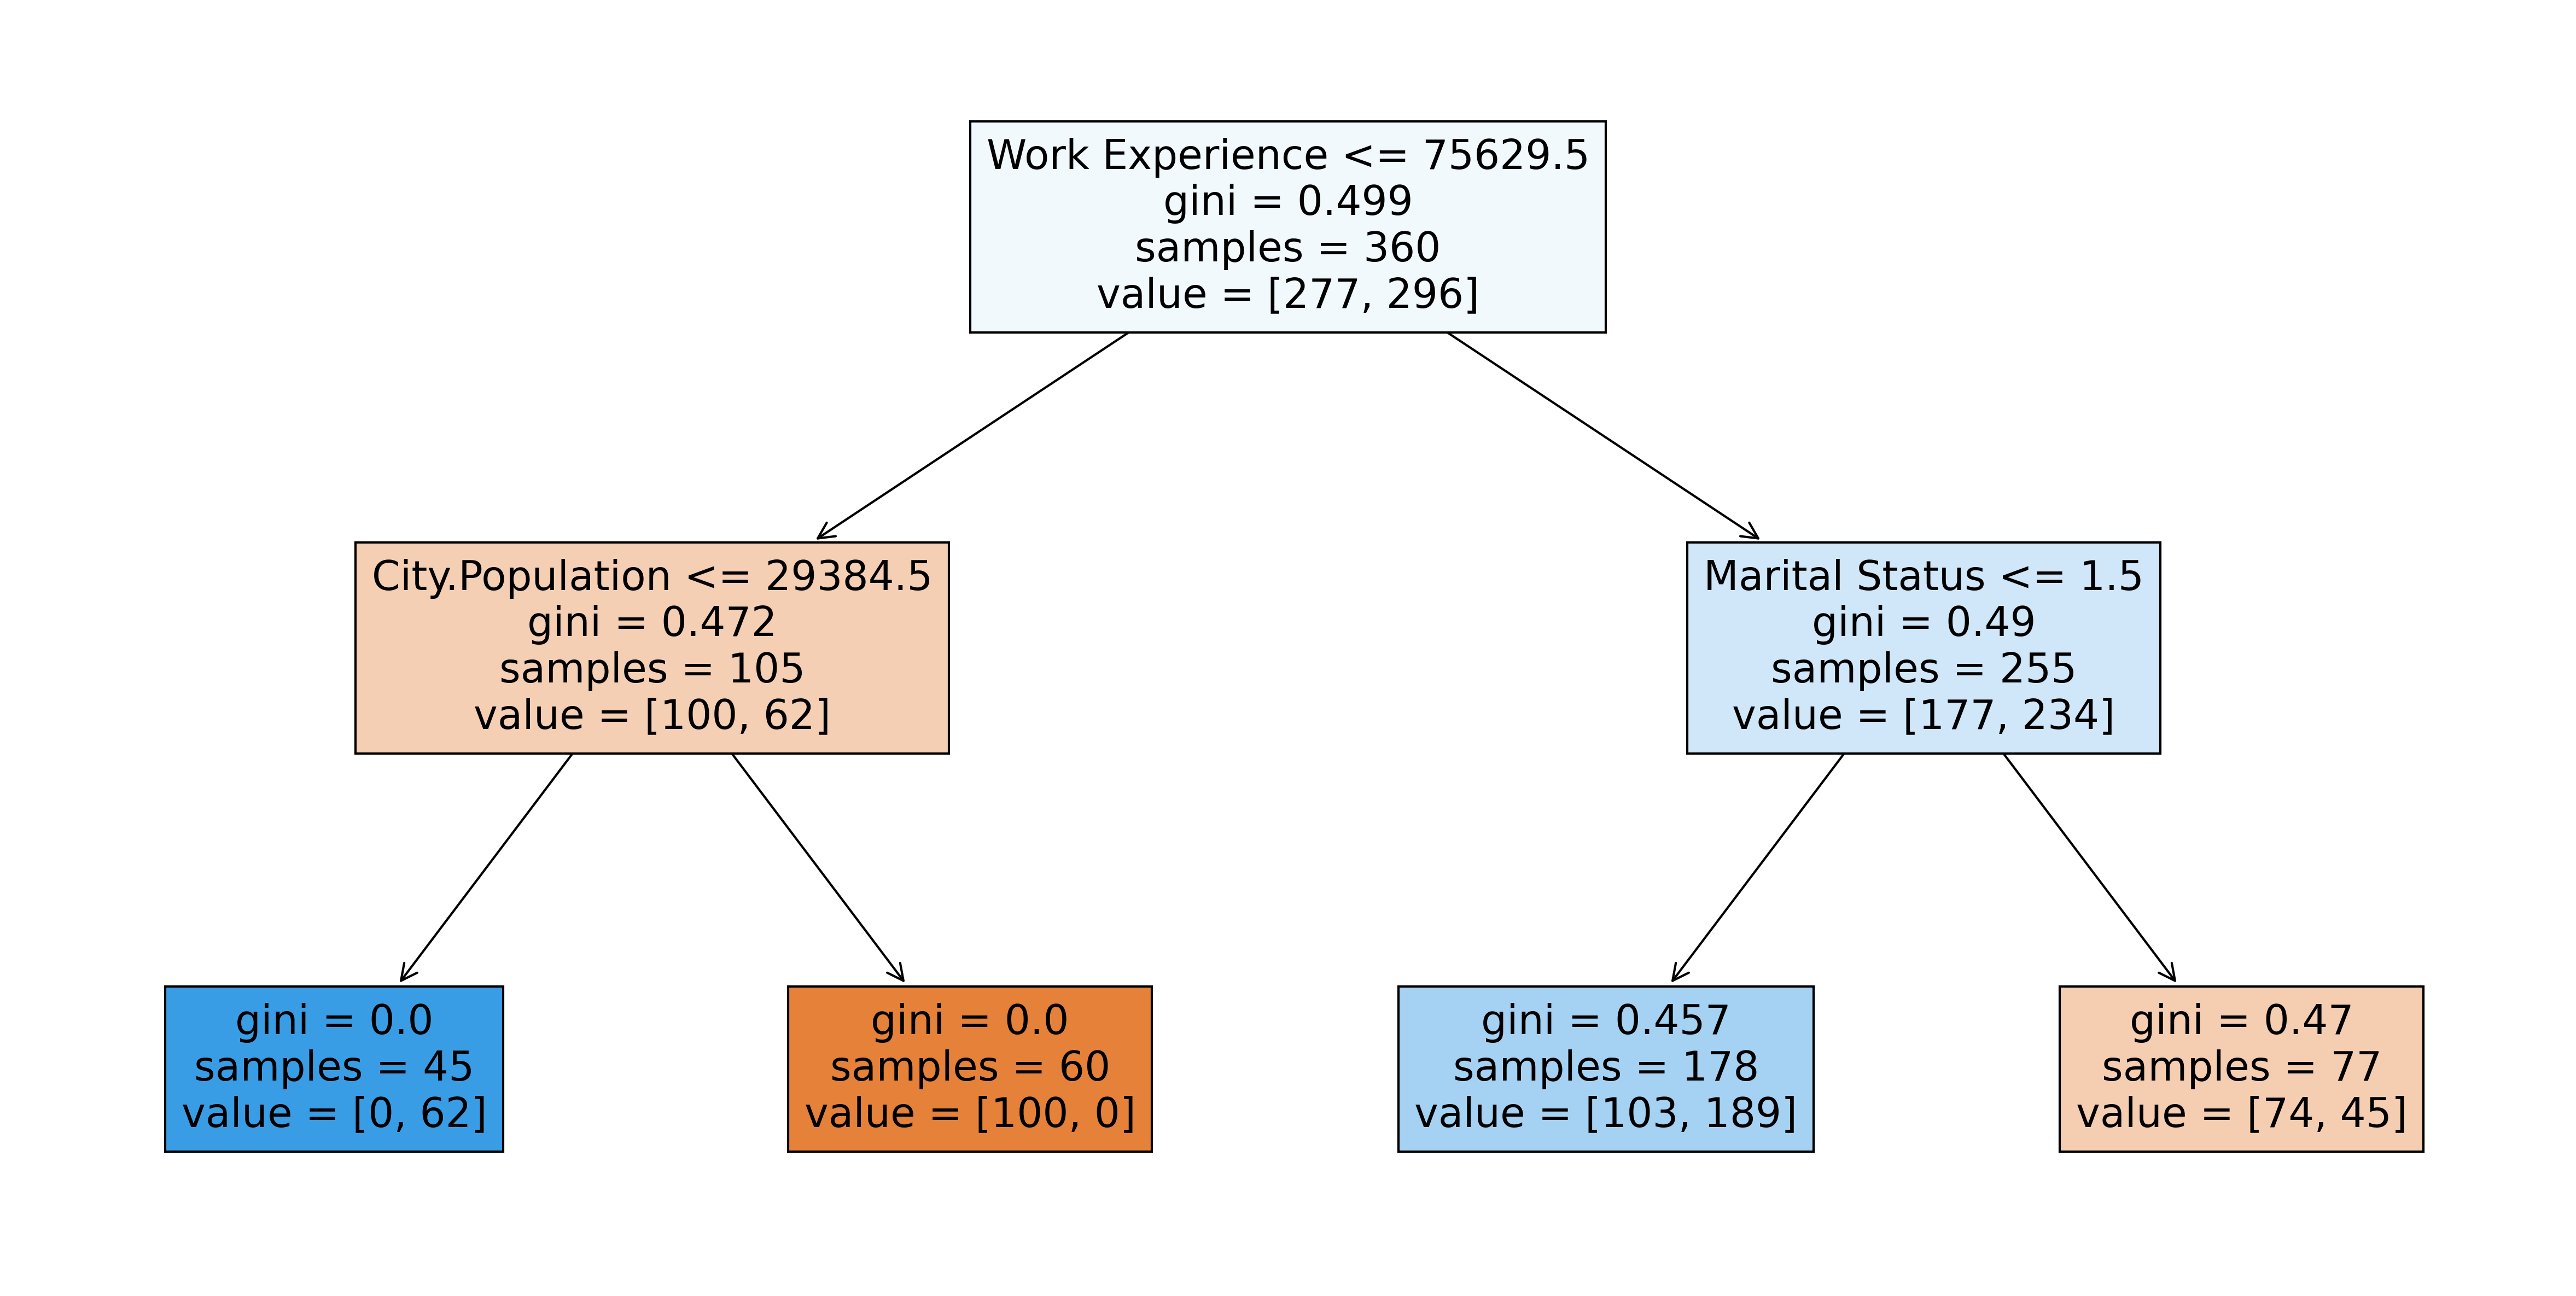

In [45]:
#plotting our forest from all the forest
plt.figure(figsize=(20,10),dpi=300)
tree.plot_tree(model2.estimators_[19],filled=True
            ,feature_names=['Undergrad' , 'Marital Status' , 'City.Population',  'Work Experience',  
                            'Taxable Income',  'Urban'])      

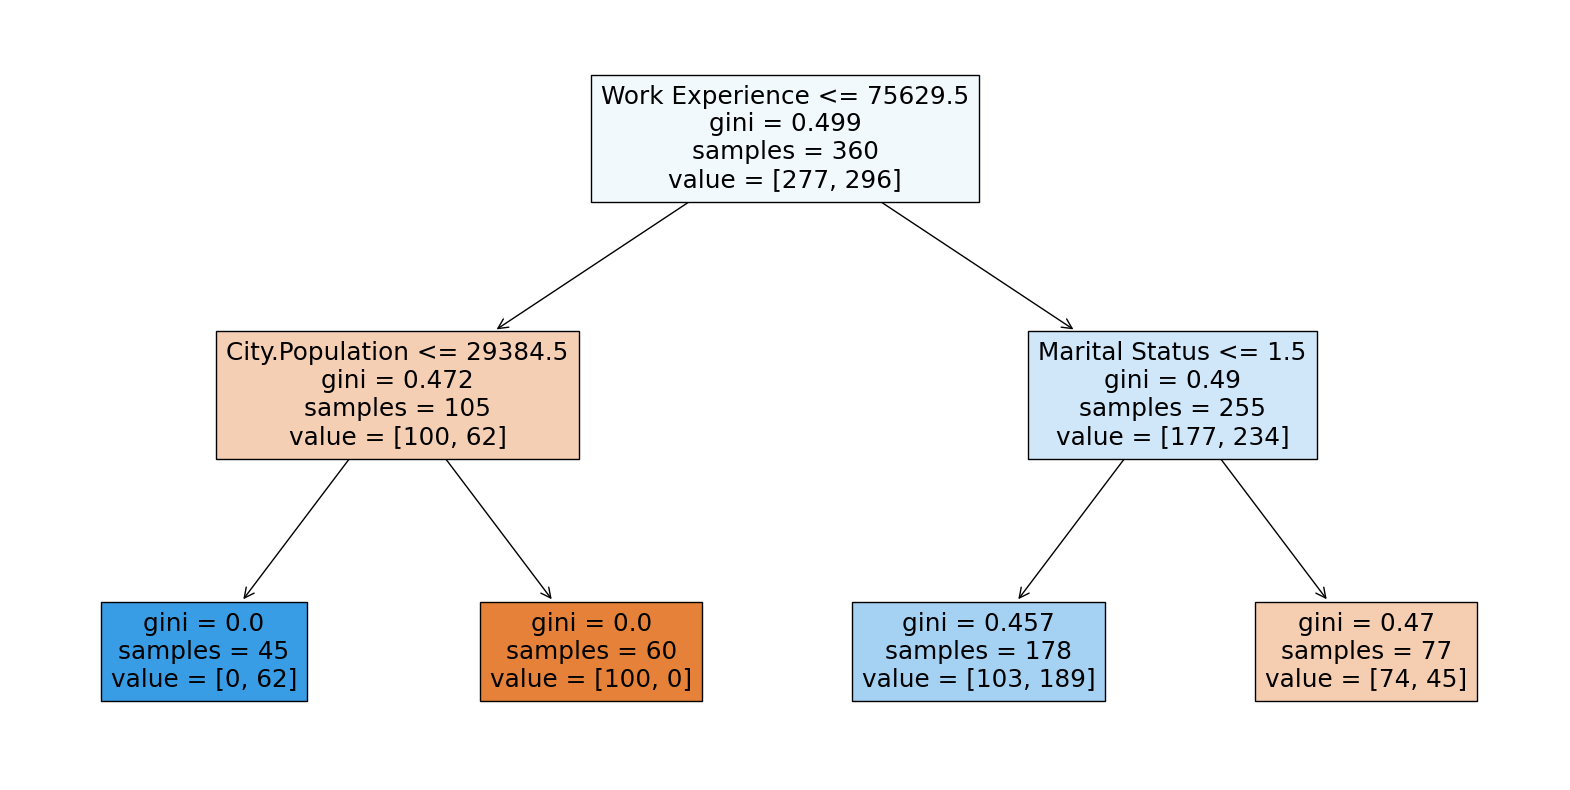

In [46]:
#checking plot for all the forests
plt.figure(figsize=(20,10))
for i in range(len(model2.estimators_)):
    tree.plot_tree(model2.estimators_[i],filled = True,
                   feature_names=['Undergrad' , 'Marital Status' , 'City.Population',  'Work Experience',  
                            'Taxable Income',  'Urban'])

In [48]:
#predicting on test data 
pred = model2.predict(X_res_test)
pd.Series(pred).value_counts()

0    105
1     86
dtype: int64

In [49]:
pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [50]:
for i in range(len(model2.estimators_)):
 print(tree.export_text(model2.estimators_[i]))

|--- feature_2 <= 29776.00
|   |--- class: 1.0
|--- feature_2 >  29776.00
|   |--- class: 0.0

|--- feature_1 <= 1.50
|   |--- feature_3 <= 73478.00
|   |   |--- class: 0.0
|   |--- feature_3 >  73478.00
|   |   |--- class: 1.0
|--- feature_1 >  1.50
|   |--- feature_5 <= 0.50
|   |   |--- class: 0.0
|   |--- feature_5 >  0.50
|   |   |--- class: 0.0

|--- feature_2 <= 30041.50
|   |--- class: 1.0
|--- feature_2 >  30041.50
|   |--- class: 0.0

|--- feature_2 <= 30205.50
|   |--- class: 1.0
|--- feature_2 >  30205.50
|   |--- class: 0.0

|--- feature_5 <= 0.50
|   |--- feature_2 <= 29971.00
|   |   |--- class: 1.0
|   |--- feature_2 >  29971.00
|   |   |--- class: 0.0
|--- feature_5 >  0.50
|   |--- feature_2 <= 30500.50
|   |   |--- class: 1.0
|   |--- feature_2 >  30500.50
|   |   |--- class: 0.0

|--- feature_1 <= 1.50
|   |--- feature_2 <= 30135.00
|   |   |--- class: 1.0
|   |--- feature_2 >  30135.00
|   |   |--- class: 0.0
|--- feature_1 >  1.50
|   |--- feature_2 <= 30041.50
| 

In [51]:
print(classification_report(y_res_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        86

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



## Checking accuracy with Bagging classifier

In [52]:
#cross validation using Kfold 
kfold = KFold(n_splits=4)
num_trees = 20
cart = DecisionTreeClassifier()

clf_bg = BaggingClassifier(base_estimator=cart,n_estimators=num_trees)
results = cross_val_score(clf_bg,X_res_train,y_res_train,cv= kfold)
print(results.mean())

0.9947673853923853


## Checking accuracy with Adaboost

In [53]:
#cross validation using Kfold 
kfold = KFold(n_splits=4)
num_trees = 20

clf_ad = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(clf_ad,X_res_train,y_res_train,cv= kfold)
print(results.mean())

0.9947673853923853


# Checking accuracy with Gradient boosting 

In [51]:
#cross validation using Kfold 
kfold = KFold(n_splits=4)
max_features = 2
num_trees = 20

clf_gb = GradientBoostingClassifier(n_estimators=num_trees,max_features=max_features)
results = cross_val_score(clf_gb,X_res_train,y_res_train,cv= kfold)
print(results.mean())

0.9947673853923853


In [54]:
# After comparing all accuracies we go ahead with random forest

In [56]:
print(classification_report(y_res_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        86

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



# Conclusions

In [57]:
# 1) the margin of accuracies is not having variations which shows are model is fit.
# 2) adaboost and gradient  are sequentially slow learners but eventually become strong learners. 
# 3) according to the tree taxable income is divided on the basis of population and work experience and dividing into categories good and risky.